# Multilayer Perceptron Demo in Breast Cancer Dataset

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imeri-course/ai-in-healthcare/blob/master/Session2/Demo_MLP.ipynb)

**Resources**: <br>
 - [Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data)<br>
 - [Breast Cancer Prediction](https://www.kaggle.com/ptynecki)<br>

# Outlines:
1. **About the Breast Cancer Wisconsin Diagnostic Dataset**
1. **Exploratory Data Analysis (EDA)**
    1. Data Overview
    1. Data Quality Checks
    1. Correlation Matrix
1. **Feature Engineering**
    1. Choose Columns
    1. Transforming the prediction target to numerical
    1. Data Split (Train and Testing)
    1. Data Preprocessing
1. **Training MLP Model Using Scikit Learn Framework**
    1. Create Model
    1. Train Process
    1. How to Predict
    1. Model Performance
1. **Training MLP Model Using Pytorch Framework**
    1. Convert dataset to dataloader
    1. Create Model Blueprint
    1. Construct the Network
    1. Set Optimizer
    1. Set Criterion
    1. Training Process
    1. Plot Results
1. **Home Work Challenge**

## 1. About the Breast Cancer Wisconsin Diagnostic Dataset
**Breast Cancer Wisconsin Diagnostic Dataset (WDBC)** consists of features which were **computed from a digitized image of a fine needle aspirate (FNA)** of a **breast mass**. Those features describe the characteristics of **the cell nuclei** found in the image.

![Breast Cancer](https://static.packt-cdn.com/products/9781783980284/graphics/3a298fcc-54fb-42c2-a212-52823e709e30.png)

This dataset has **569 instances**: **212 - Malignant** and **357 - Benign**. It consists of **31 attributes** including the class attribute. The attributes description is ten real-valued features which are computed for each cell nucleus. 
These features include: Texture, Radius, Perimeter, Smoothness, Area, Concavity, Compactness, Symmetry, Concave points and Fractal dimension.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seed
np.random.seed(31415)

# Download Data
! wget https://raw.githubusercontent.com/imeri-course/ai-in-healthcare/master/Session2/breast_cancer_data.csv

## 2. Exploratory Data Analysis (EDA)

### 2.1. Data Overview

In [3]:
# Load Data
breast_cancer = pd.read_csv('breast_cancer_data.csv')

In [4]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
breast_cancer.shape

(569, 33)

In [7]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
breast_cancer.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

### 2.2. Data Quality Checks

In [9]:
# Check if Any null data
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# Check result after del
breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
# Check if any 0 data in any column
for field in breast_cancer.columns:
    amount = sum(breast_cancer[field] == 0)
    if amount > 0:
        print('Number of 0-entries for "{field_name}" feature: {amount}'.format(
            field_name=field,
            amount=amount
        ))

Number of 0-entries for "concavity_mean" feature: 13
Number of 0-entries for "concave points_mean" feature: 13
Number of 0-entries for "concavity_se" feature: 13
Number of 0-entries for "concave points_se" feature: 13
Number of 0-entries for "concavity_worst" feature: 13
Number of 0-entries for "concave points_worst" feature: 13


### 2.3. Correlation Matrix
Check The relationships between pairs of variables.

In [60]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
breast_cancer.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


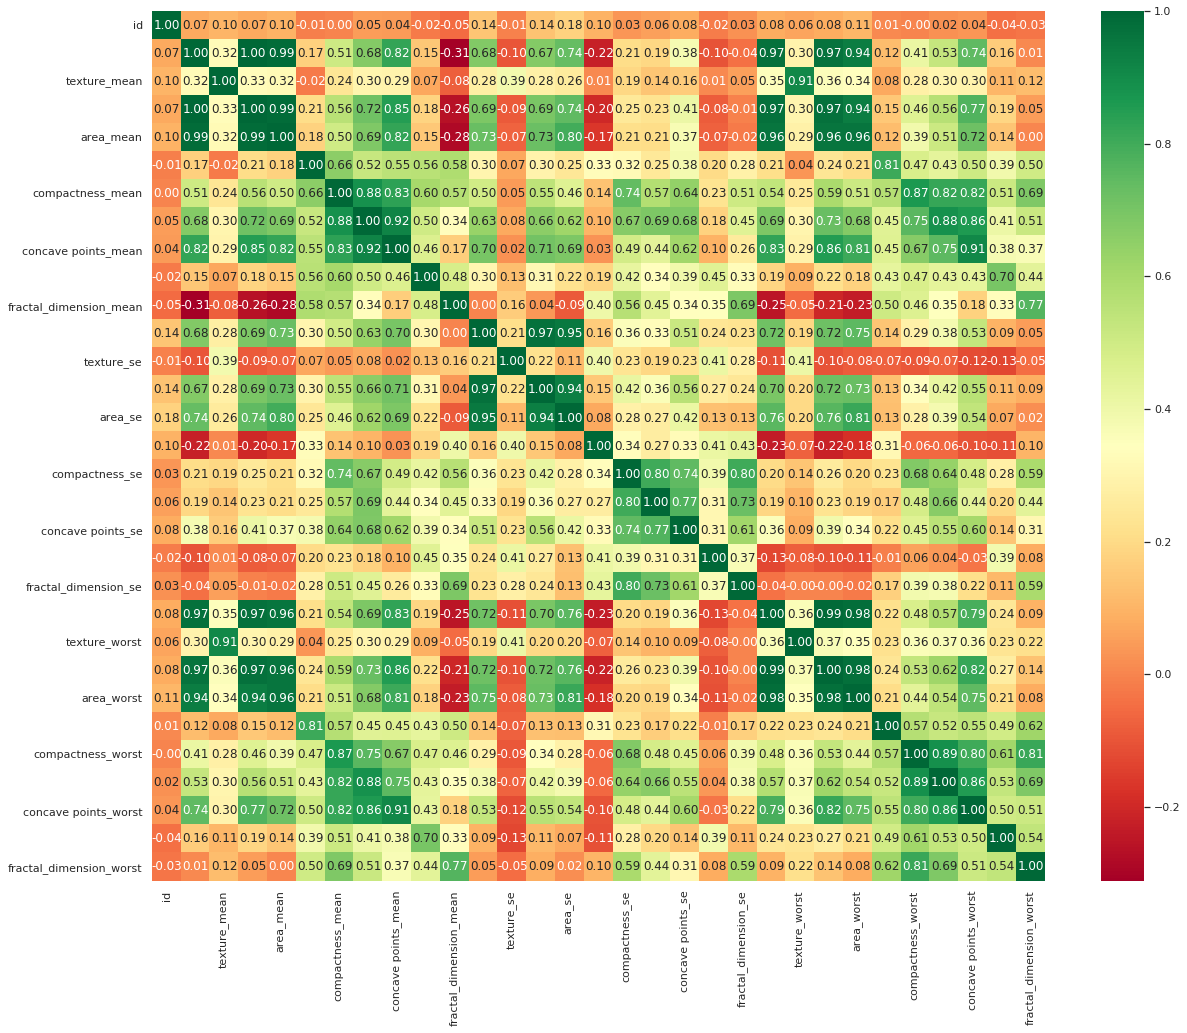

In [62]:
# Plot the correlation

import matplotlib.pyplot as plt
import seaborn as sns

# convert to heatmap
sns.heatmap(
    data=breast_cancer.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

# Configure the plot
fig = plt.gcf()
fig.set_size_inches(20, 16)
plt.show()

## 3. Feature Engineering

#### 3.1. Chose Columns

There is an `Unnamed: 32` column in data with Null values

In [ ]:
# delete column `Unnamed: 32`
del breast_cancer['Unnamed: 32']

In [13]:
# Initial Columns
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
# Choose Columns after diagnosis
breast_cancer.columns[2:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
# Select Features
feature_names = breast_cancer.columns[2:]
X = breast_cancer[feature_names]

# "diagnosis" feature is our class which I wanna predict
y = breast_cancer['diagnosis']

In [16]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

#### 3.2. Transforming the prediction target to numerical
For the input neural network, need covert it to numerical <br>
M -> 1 and B -> 0

In [18]:
from sklearn.preprocessing import LabelEncoder
# Create Object
class_le = LabelEncoder()

# class_le Learn our data
class_le.fit(y)

# Transform all data to number
y = class_le.transform(y)

In [19]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [23]:
## Utils Function
import pandas as pd
def to_dataframe(x, y=None, columns=None):
    """
    Convert data to dataframe, just for preview
    """
    # add data features
    df = pd.DataFrame(x, columns=columns)
    if not y is None:
        # add Target
        df['target'] = y
    return df

#### 3.4. Data Split
Split data into train and test data, to make sure our model not overfit with data train

In [24]:
from sklearn.model_selection import train_test_split
# Split Dataset to train and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
x_train.shape

(455, 30)

In [26]:
x_test.shape

(114, 30)

#### 3.5. Data Preprocessing **(Data Normalization using z-score (also called a standard score))**

Use standar scale for processing the data <br>
`z = (x - u) / s` <br>
where `u` is the mean of the training samples and `s` is the standard deviation of the training samples

In [27]:
# before Scalling
to_dataframe(x=x_train, columns=feature_names).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.004262,19.110813,91.076835,644.501319,0.096158,0.102539,0.086166,0.047392,0.180532,0.062795,...,16.098253,25.497824,106.009846,863.593626,0.132362,0.249733,0.264910,0.111913,0.288642,0.083653
std,3.570494,4.196843,24.576776,355.231636,0.014212,0.053202,0.079608,0.038969,0.027535,0.007113,...,4.856503,6.125618,33.744959,567.813091,0.023056,0.155808,0.204041,0.065559,0.062184,0.017614
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.023440,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.615000,16.160000,74.585000,412.650000,0.085925,0.062890,0.028680,0.019315,0.161650,0.057800,...,12.930000,20.940000,83.715000,510.050000,0.116200,0.142350,0.114450,0.062245,0.249600,0.071465
50%,13.160000,18.770000,85.090000,537.300000,0.094880,0.087110,0.057860,0.031520,0.178400,0.061490,...,14.730000,25.260000,96.050000,660.200000,0.131300,0.205000,0.215100,0.097220,0.280600,0.079570
75%,15.510000,21.600000,102.500000,744.800000,0.105300,0.129650,0.120400,0.067655,0.195100,0.066100,...,18.115000,29.585000,122.900000,1015.000000,0.146600,0.325650,0.375150,0.156200,0.315100,0.091860
max,28.110000,33.810000,188.500000,2499.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.222600,0.937900,1.252000,0.291000,0.663800,0.173000


In [28]:
from sklearn.preprocessing import StandardScaler

# Create the object scaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)

StandardScaler()

In [29]:
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
# After Scalling
to_dataframe(x=x_train, columns=feature_names).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,5.934203e-16,2.713336e-16,7.964325e-16,2.615734e-16,-6.910223e-16,-1.561632e-16,-2.147245e-17,-5.075305e-17,2.303408e-16,1.776357e-16,...,-1.171224e-17,-3.513673e-16,3.943122e-16,-8.003366e-17,2.654775e-16,-2.830459e-17,1.561632e-16,-2.342449e-17,-2.459571e-16,9.935886e-16
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.969193e+00,-2.242438e+00,-1.926163e+00,-1.411903e+00,-3.066102e+00,-1.488414e+00,-1.083560e+00,-1.217482e+00,-2.709767e+00,-1.806407e+00,...,-1.683772e+00,-2.202661e+00,-1.649463e+00,-1.196063e+00,-2.656947e+00,-1.429247e+00,-1.299750e+00,-1.708927e+00,-2.127367e+00,-1.626189e+00
25%,-6.699050e-01,-7.038770e-01,-6.717719e-01,-6.533948e-01,-7.208254e-01,-7.460789e-01,-7.228999e-01,-7.212898e-01,-6.865031e-01,-7.029953e-01,...,-6.530913e-01,-7.448785e-01,-6.614139e-01,-6.233262e-01,-7.017654e-01,-6.899599e-01,-7.382145e-01,-7.584339e-01,-6.285458e-01,-6.926792e-01
50%,-2.367154e-01,-8.129643e-02,-2.438654e-01,-3.021108e-01,-9.004154e-02,-2.903285e-01,-3.559517e-01,-4.077498e-01,-7.752420e-02,-1.836597e-01,...,-2.820463e-01,-3.886725e-02,-2.954755e-01,-3.585995e-01,-4.613062e-02,-2.874194e-01,-2.443874e-01,-2.243591e-01,-1.294753e-01,-2.320341e-01
75%,4.221814e-01,5.937622e-01,4.653067e-01,2.826581e-01,6.439359e-01,5.101512e-01,4.305095e-01,5.205394e-01,5.296369e-01,4.651579e-01,...,4.157244e-01,6.679611e-01,5.010747e-01,2.669418e-01,6.181881e-01,4.877844e-01,5.408787e-01,6.762767e-01,4.259419e-01,4.664641e-01
max,3.954989e+00,3.506295e+00,3.968397e+00,5.226280e+00,4.736459e+00,4.569942e+00,4.283591e+00,3.951240e+00,4.488909e+00,4.875992e+00,...,3.510858e+00,3.929177e+00,3.657609e+00,4.528310e+00,3.918072e+00,4.421630e+00,4.843038e+00,2.734698e+00,6.039680e+00,5.078030e+00


## 4. Training MLP Model Using Scikit Learn Framework

### 4.1. Create Model

Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

In [31]:
from sklearn.neural_network import MLPClassifier

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. There are many ways to choose these numbers, but for simplicity we will choose 3 layers with the same number of neurons as there are features in our data set:

check for library :
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

![MLP](https://www.researchgate.net/profile/Nicolas_Yu/publication/316615322/figure/fig1/AS:512951140483072@1499308491041/MLP-with-one-hidden-layer-It-consists-of-three-layers-the-input-layer-the-hidden-layer.png "MLP")

In [32]:
mlp = MLPClassifier(
    hidden_layer_sizes = (10),
    max_iter=1000,
    alpha=0.1,
    activation='relu',
    solver='adam',
    random_state=42,
    verbose=True,
    learning_rate_init = 0.0001,
)

Other parameter options: <br>
- **max_iter** = 1 - any number <br>
- **activation** : `identity`, `logistic`, `tanh`, `relu` <br>
- **alpha / legularization** = `1e-4`, `1e-3`, `0.01`, `0.1`, `1` , and so on <br>
- **solver / optimizer** = `lbfgs`, `sgd`, `adam` <br>
- **learning_rate_init** = `1e-4`, `1e-3`, `0.01`, `0.1`, `1`, and so on 

### 4.2. Training Process

In [33]:
# Let Model Learn the data
mlp.fit(x_train, y_train)

Iteration 1, loss = 0.74715434
Iteration 2, loss = 0.74202574
Iteration 3, loss = 0.73711399
Iteration 4, loss = 0.73218640
Iteration 5, loss = 0.72732107
Iteration 6, loss = 0.72246699
Iteration 7, loss = 0.71778088
Iteration 8, loss = 0.71298411
Iteration 9, loss = 0.70831864
Iteration 10, loss = 0.70366119
Iteration 11, loss = 0.69913819
Iteration 12, loss = 0.69455392
Iteration 13, loss = 0.69013214
Iteration 14, loss = 0.68558756
Iteration 15, loss = 0.68127158
Iteration 16, loss = 0.67703391
Iteration 17, loss = 0.67275372
Iteration 18, loss = 0.66847459
Iteration 19, loss = 0.66443431
Iteration 20, loss = 0.66029484
Iteration 21, loss = 0.65621434
Iteration 22, loss = 0.65220471
Iteration 23, loss = 0.64814310
Iteration 24, loss = 0.64419958
Iteration 25, loss = 0.64041335
Iteration 26, loss = 0.63645093
Iteration 27, loss = 0.63279668
Iteration 28, loss = 0.62908986
Iteration 29, loss = 0.62544565
Iteration 30, loss = 0.62183697
Iteration 31, loss = 0.61823248
Iteration 32, los

MLPClassifier(alpha=0.1, hidden_layer_sizes=10, learning_rate_init=0.0001,
              max_iter=1000, random_state=42, verbose=True)

### 4.3. How to Predict

#### 4.3.1. Prediction

In [34]:
# Let's Predict data test
mlp_predict = mlp.predict(x_test)
mlp_predict

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1])

#### 4.3.2. Probability

In [35]:
# Let's check the probability
mlp_predict_proba = mlp.predict_proba(x_test)[:, 1]
mlp_predict_proba

array([9.36093818e-01, 4.87721928e-01, 9.88104989e-01, 8.12795450e-02,
       8.11712787e-01, 1.23764258e-02, 1.53559147e-01, 9.82710525e-01,
       4.20860251e-04, 1.56679048e-03, 9.98758935e-01, 5.82621552e-03,
       4.81475973e-02, 1.72055033e-01, 1.25364476e-03, 5.40951945e-02,
       1.53875615e-02, 8.28529900e-02, 9.99238353e-01, 9.59387406e-03,
       9.66598950e-01, 3.06713539e-02, 9.57957477e-01, 8.08979243e-03,
       6.40501180e-03, 8.25682035e-03, 7.71358799e-04, 1.88756864e-03,
       9.67973944e-01, 7.45284930e-01, 2.63394714e-03, 9.95040387e-01,
       9.12595171e-01, 1.98480825e-02, 9.85790680e-04, 5.73109929e-01,
       1.85015525e-01, 5.85449404e-01, 9.75695939e-01, 9.14782748e-01,
       1.35318570e-04, 9.78695637e-01, 3.87831227e-02, 1.05526250e-01,
       9.99223701e-01, 1.20365499e-04, 9.99489029e-01, 3.36291893e-01,
       2.06430518e-02, 1.16613933e-02, 3.23102047e-03, 4.76949505e-01,
       9.46251086e-01, 3.17299659e-02, 9.96324953e-01, 9.96458707e-01,
      

### 4.4. Model Performance

Scikit learn have bundle of metrics for calculate model performance <br>
Check the library : https://scikit-learn.org/stable/modules/model_evaluation.html

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

#### 4.4.1. General Report

In [37]:
print(classification_report(y_test, mlp_predict))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        64
           1       0.92      0.96      0.94        50

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



#### 4.4.2. Accuracy

In [38]:
print(accuracy_score(y_test, mlp_predict) * 100)

94.73684210526315


#### 4.4.3. AUC

In [39]:
print(roc_auc_score(y_test, mlp_predict_proba) * 100)

98.5625


#### 4.4.4. Training Vs Testing 

In [40]:
# Training
print(mlp.score(x_train, y_train) * 100)

96.7032967032967


In [41]:
# Testing
print(mlp.score(x_test, y_test) * 100)

94.73684210526315


In [42]:
assert False, "Stop For run Through"

AssertionError: Stop For run Through

## 5. Training MLP Model Using Pytorch Framework

In [43]:
# Import Modules
import torch
import torchvision

# random seed for reusable training
random_seed = 1
torch.manual_seed(random_seed)
torch.backends.cudnn.enabled = False

### 5.1. Dataset to dataloader

Sometimes one epoch is too big to feed to the computer at once we divide it in several smaller batches. <br>
`Epoch` = **One Epoch** is when an **ENTIRE dataset** is passed **forward** and **backward** through the neural network **only ONCE**. <br>
`Batch Size` = Total number of training examples present **in a single batch**.

In [44]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

def create_data_loader(x, y, batch_size):
    """
    Function to create data loader, split full data to minibatch
    ex(batch_size=2): [1,2,3,4,5,6,7,8] --> [[1,2], [3,4], [5,6], [7,8]]
    """
    # Convert numpy data to torch tensor
    x_tensor = torch.Tensor(x)
    y_tensor = torch.Tensor(y)
    
    # Create tensordataset
    dataset = TensorDataset(x_tensor, y_tensor)
    
    # Create Dataloader with batch_size
    data_loader = DataLoader(dataset, batch_size=batch_size)
    
    return data_loader

# Parameter batch_size
train_batch_size = 1000
test_batch_size = 1000

train_data_loader = create_data_loader(x=x_train, y=y_train, batch_size=train_batch_size)
test_data_loader = create_data_loader(x=x_test, y=y_test, batch_size=test_batch_size)

In [45]:
# get sample data
examples = enumerate(train_data_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [46]:
# Data Training Shape
example_data.shape

torch.Size([455, 30])

In [47]:
# Target Training Shape
example_targets.shape

torch.Size([455])

### 5.2. Create Model Blueprint

In [48]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

![MLP](https://www.researchgate.net/profile/Nicolas_Yu/publication/316615322/figure/fig1/AS:512951140483072@1499308491041/MLP-with-one-hidden-layer-It-consists-of-three-layers-the-input-layer-the-hidden-layer.png "MLP")

In [49]:
class Net(nn.Module):
    """
    Single Hidden Layer Network
    """
    def __init__(self, input_shape, output_class, hidden_nodes):
        """
        Args:
            input_shape: Shape of data
            output_class: number of output class data
            hidden_nodes: number of hidden nodes in each layer 
        """
        
        # Init
        super(Net,self).__init__()
        self.input_shape = input_shape
        self.output_class = output_class
        self.hidden_nodes = hidden_nodes
        
        # linear layer (input_shape -> hidden_nodes)
        self.fc1 = nn.Linear(input_shape, hidden_nodes)
        
        # linear layer (hidden_nodes -> output_class)
        self.fc2 = nn.Linear(hidden_nodes, output_class)
        
        
    def forward(self,x):
        # flatten image input
        x = x.view(-1, self.input_shape)
        
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        
        # add output layer
        x = self.fc2(x)
        
        return x

### 5.3. Construct the Network

In [50]:
network = Net(input_shape=30, output_class=1, hidden_nodes=10)

# with Cuda Gpu Acceleration
if torch.cuda.is_available():
    network.cuda()

### 5.4. Set the Optimizer
- [Simple theory of Optimizers](https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3)
- [Torch optimizer documents](https://pytorch.org/docs/stable/optim.html)

In [51]:
learning_rate = 0.0001
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

### 5.5. Set Criterion
- [A brief overview of loss function in pytorch](https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7)
- [Torch Loss Function list](https://pytorch.org/docs/stable/nn.html#loss-functions)

In [52]:
criterion = nn.BCEWithLogitsLoss() # nn.CrossEntropyLoss() #  nn.MSELoss() # nn.SmoothL1Loss() # nn.NLLLoss()

### 5.6. Training Process

In [53]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc


def one_epoch_train(network, optimizer, data_loader):
    """
    One Epoch Training Function
    """
    # init arrays
    acc_epoch = np.zeros(len(data_loader))
    loss_epoch = np.zeros(len(data_loader))
    
    # Set to Train mode on
    network.train() 
    # Start Training
    for batch_idx, (data, target) in enumerate(data_loader):
        
        # Convert data and target to cuda datatype
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        # Main Training Process
        optimizer.zero_grad() # Clear all Gradient in Optimizer
        output = network(data) # Forward Propagation
        loss = criterion(output.view(-1), target) # Calculcate loss between forward result and target
        loss.backward() # Backward Propagation
        optimizer.step() # Update Gradient in Optimizer
        
        # Put loss and accuracy to arrays
        loss_epoch[batch_idx] = loss.item()
        acc_epoch[batch_idx] = binary_acc(output.view(-1), target)
        
    return loss_epoch.mean(), acc_epoch.mean()

def one_epoch_test(network, optimizer, data_loader):
    """
    One Epoch Testing Function
    """
    # init arrays
    acc_epoch = np.zeros(len(data_loader))
    loss_epoch = np.zeros(len(data_loader))
    
    # Set to Train mode of
    network.eval()
    
    # Should deactivate all gradient proccess
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):

            # Convert data and target to cuda datatype
            if torch.cuda.is_available():
                data = data.cuda()
                target = target.cuda()

            # Main Training Process
            output = network(data) # Only Forward Propagation
            loss = criterion(output.view(-1), target) # Calculcate loss between forward result and target

            # Put loss and accuracy to arrays
            loss_epoch[batch_idx] = loss.item()
            acc_epoch[batch_idx] = binary_acc(output.view(-1), target)
        
    return loss_epoch.mean(), acc_epoch.mean()

In [54]:
n_epochs = 1000
log_interval = 50

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accs = np.zeros(n_epochs)
test_accs = np.zeros(n_epochs)

for epoch in range(n_epochs):
    train_loss, train_acc = one_epoch_train(network, optimizer, train_data_loader)
    test_loss, test_acc = one_epoch_test(network, optimizer, test_data_loader)
    
    train_losses[epoch] = train_loss
    test_losses[epoch] = test_loss
    train_accs[epoch] = train_acc
    test_accs[epoch] = test_acc
    if epoch % log_interval == 0:
        print('Train Epoch: {}/{} \t loss(train | test): {:.6f} | {:.6f} \t acc(train|test): {:.0f}% | {:.0f}%'.format(epoch, n_epochs, train_loss, test_loss, train_acc, test_acc))

Train Epoch: 0/1000 	 loss(train | test): 0.707311 | 0.710933 	 acc(train|test): 44% | 41%
Train Epoch: 50/1000 	 loss(train | test): 0.674442 | 0.678563 	 acc(train|test): 62% | 61%
Train Epoch: 100/1000 	 loss(train | test): 0.643301 | 0.647630 	 acc(train|test): 82% | 79%
Train Epoch: 150/1000 	 loss(train | test): 0.613415 | 0.617352 	 acc(train|test): 88% | 82%
Train Epoch: 200/1000 	 loss(train | test): 0.583481 | 0.587764 	 acc(train|test): 91% | 89%
Train Epoch: 250/1000 	 loss(train | test): 0.553274 | 0.559096 	 acc(train|test): 93% | 91%
Train Epoch: 300/1000 	 loss(train | test): 0.523489 | 0.531561 	 acc(train|test): 94% | 93%
Train Epoch: 350/1000 	 loss(train | test): 0.494272 | 0.504830 	 acc(train|test): 95% | 94%
Train Epoch: 400/1000 	 loss(train | test): 0.466485 | 0.479465 	 acc(train|test): 95% | 94%
Train Epoch: 450/1000 	 loss(train | test): 0.440185 | 0.455487 	 acc(train|test): 95% | 93%
Train Epoch: 500/1000 	 loss(train | test): 0.415411 | 0.432835 	 acc(tra

### 5.7. Plot Results

In [55]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

def plot_(train, test, xlabel="epoch", ylabel="loss", title="Result Training", rolling=20):
    """
    Function for plot the result
    """
    df = pd.DataFrame()
    df['train'] = train
    df['test'] = test
    df = df.rolling(rolling).mean()
    sns.lineplot(hue="region", style="event",data=df)
    # other info
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

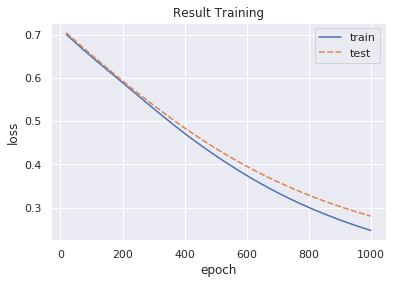

In [56]:
# Check Loss
plot_(train_losses, test_losses)

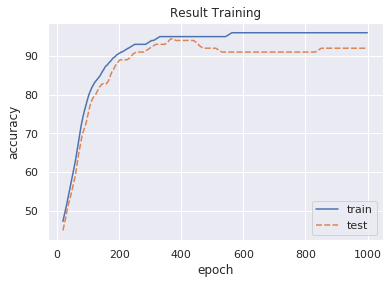

In [57]:
# Check accuracy
plot_(train_accs, test_accs, ylabel="accuracy")

## 6. Home Work Challenge !
**Rules**:
- Get accuracy more than **98%** (train and test)
- Not overfit with data train
- Only use "Multi-Layer Perceptron" models,  on your Network
- Can change:
   - loss function
   - learning rate
   - optimizer
   - network configuration (hidden layer, add nn.Linear, etc)
   - etc, except above restriction